In [3]:
# Block 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.spatial.distance import euclidean
import seaborn as sns

# Set up plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("🔬 Lab Exercise V - Time Alignment and Normalization")
print("=" * 55)

🔬 Lab Exercise V - Time Alignment and Normalization


In [4]:
# Block 2: Define the given signals
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Reference signal
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  # Test signal

print("Signal 1 (Reference):", signal1)
print("Signal 2 (Test):", signal2)
print(f"Signal 1 length: {len(signal1)} samples")
print(f"Signal 2 length: {len(signal2)} samples")

Signal 1 (Reference): [0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2]
Signal 2 (Test): [0.2 0.3 0.5 0.7 0.9 1.  0.9 0.7 0.5 0.4 0.3 0.2]
Signal 1 length: 9 samples
Signal 2 length: 12 samples


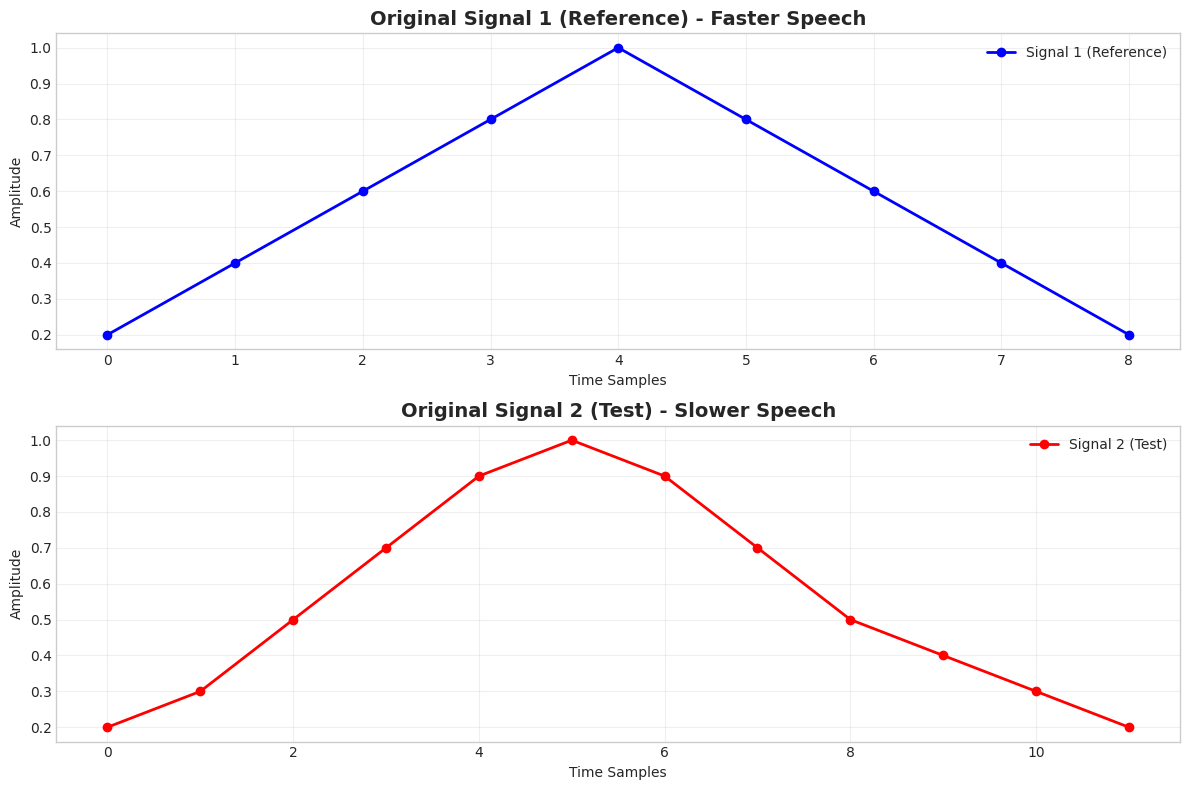

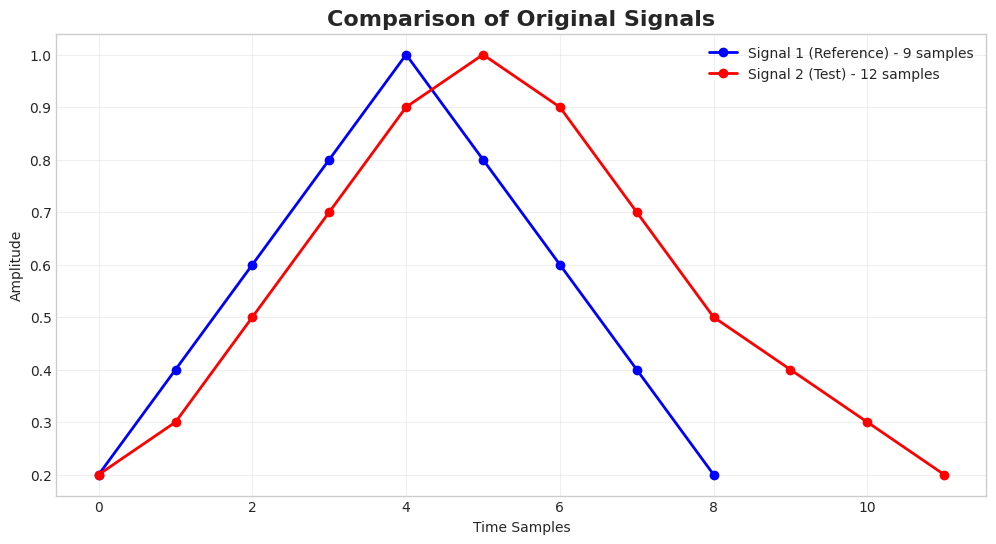

In [5]:
# Block 3: Plot both original signals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot Signal 1
ax1.plot(signal1, 'o-', linewidth=2, markersize=6, label='Signal 1 (Reference)', color='blue')
ax1.set_title('Original Signal 1 (Reference) - Faster Speech', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Samples')
ax1.set_ylabel('Amplitude')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot Signal 2
ax2.plot(signal2, 'o-', linewidth=2, markersize=6, label='Signal 2 (Test)', color='red')
ax2.set_title('Original Signal 2 (Test) - Slower Speech', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time Samples')
ax2.set_ylabel('Amplitude')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Comparative plot
plt.figure(figsize=(12, 6))
plt.plot(signal1, 'o-', linewidth=2, markersize=6, label='Signal 1 (Reference) - 9 samples', color='blue')
plt.plot(signal2, 'o-', linewidth=2, markersize=6, label='Signal 2 (Test) - 12 samples', color='red')
plt.title('Comparison of Original Signals', fontsize=16, fontweight='bold')
plt.xlabel('Time Samples')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [6]:
# Block 4: Perform Linear Time Normalization on Signal 2
def linear_time_normalization(signal, target_length):
    """
    Perform linear time normalization using interpolation
    """
    original_length = len(signal)
    original_indices = np.linspace(0, 1, original_length)
    target_indices = np.linspace(0, 1, target_length)
    
    # Create interpolation function
    interp_func = interpolate.interp1d(original_indices, signal, kind='linear')
    
    # Interpolate to target length
    normalized_signal = interp_func(target_indices)
    
    return normalized_signal

# Normalize Signal 2 to match Signal 1 length
target_length = len(signal1)
signal2_normalized = linear_time_normalization(signal2, target_length)

print("Linear Time Normalization Results:")
print("=" * 40)
print(f"Target length: {target_length} samples")
print(f"Original Signal 2: {signal2}")
print(f"Normalized Signal 2: {signal2_normalized.round(3)}")

Linear Time Normalization Results:
Target length: 9 samples
Original Signal 2: [0.2 0.3 0.5 0.7 0.9 1.  0.9 0.7 0.5 0.4 0.3 0.2]
Normalized Signal 2: [0.2   0.375 0.65  0.912 0.95  0.725 0.475 0.338 0.2  ]


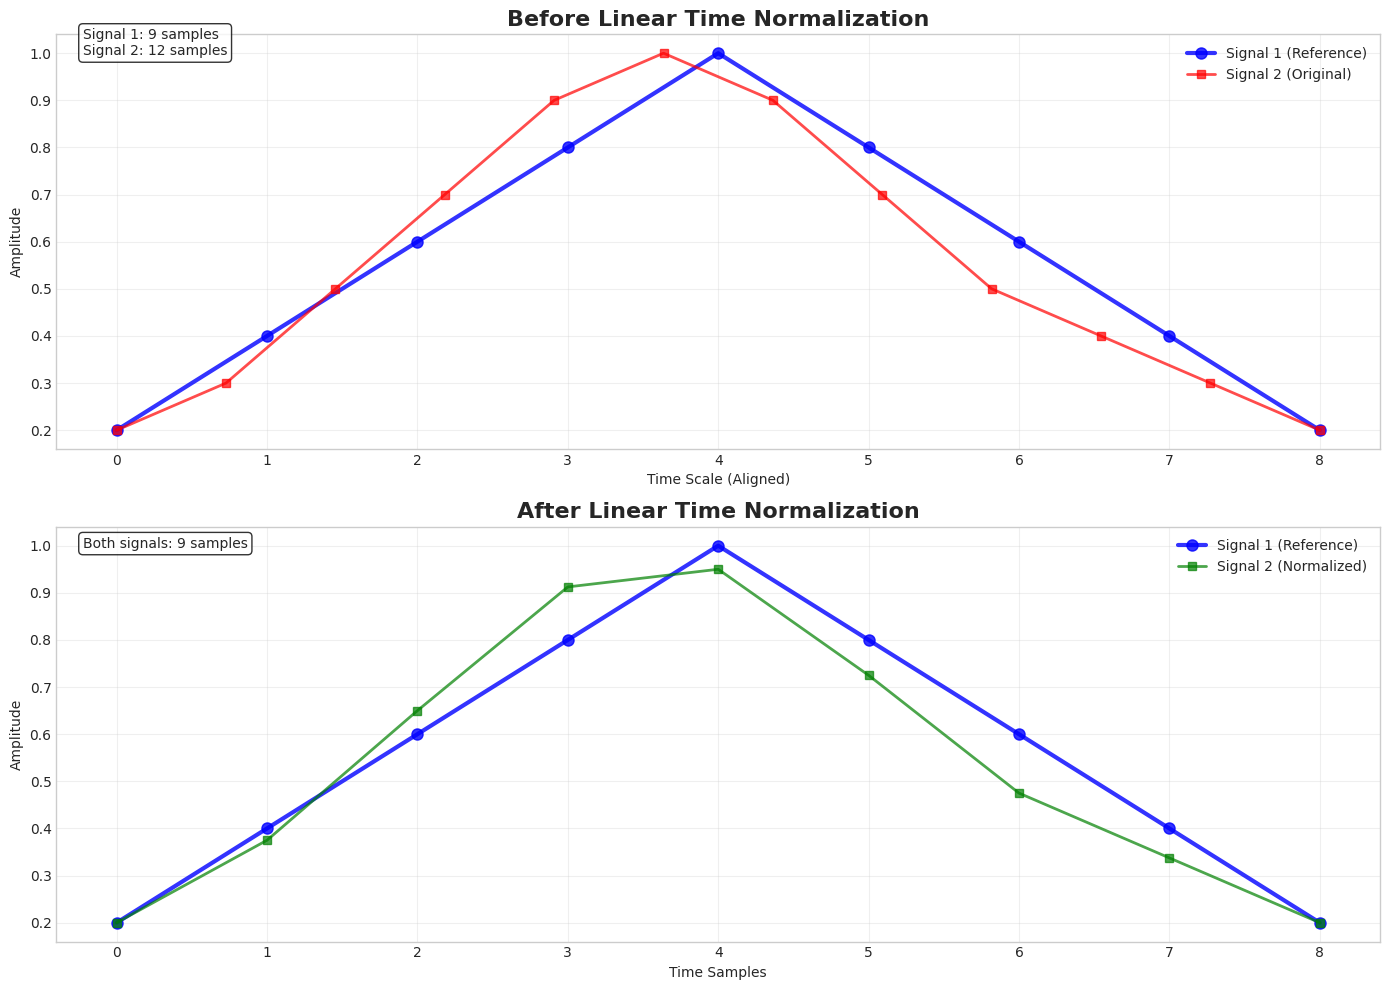

In [7]:
# Block 5: Plot comparison before and after normalization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Before normalization
ax1.plot(signal1, 'o-', linewidth=3, markersize=8, label='Signal 1 (Reference)', color='blue', alpha=0.8)
ax1.plot(np.linspace(0, len(signal1)-1, len(signal2)), signal2, 's-', linewidth=2, markersize=6, 
         label='Signal 2 (Original)', color='red', alpha=0.7)
ax1.set_title('Before Linear Time Normalization', fontsize=16, fontweight='bold')
ax1.set_xlabel('Time Scale (Aligned)')
ax1.set_ylabel('Amplitude')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.text(0.02, 0.95, f'Signal 1: {len(signal1)} samples\nSignal 2: {len(signal2)} samples', 
         transform=ax1.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# After normalization
ax2.plot(signal1, 'o-', linewidth=3, markersize=8, label='Signal 1 (Reference)', color='blue', alpha=0.8)
ax2.plot(signal2_normalized, 's-', linewidth=2, markersize=6, label='Signal 2 (Normalized)', color='green', alpha=0.7)
ax2.set_title('After Linear Time Normalization', fontsize=16, fontweight='bold')
ax2.set_xlabel('Time Samples')
ax2.set_ylabel('Amplitude')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.text(0.02, 0.95, f'Both signals: {len(signal1)} samples', 
         transform=ax2.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

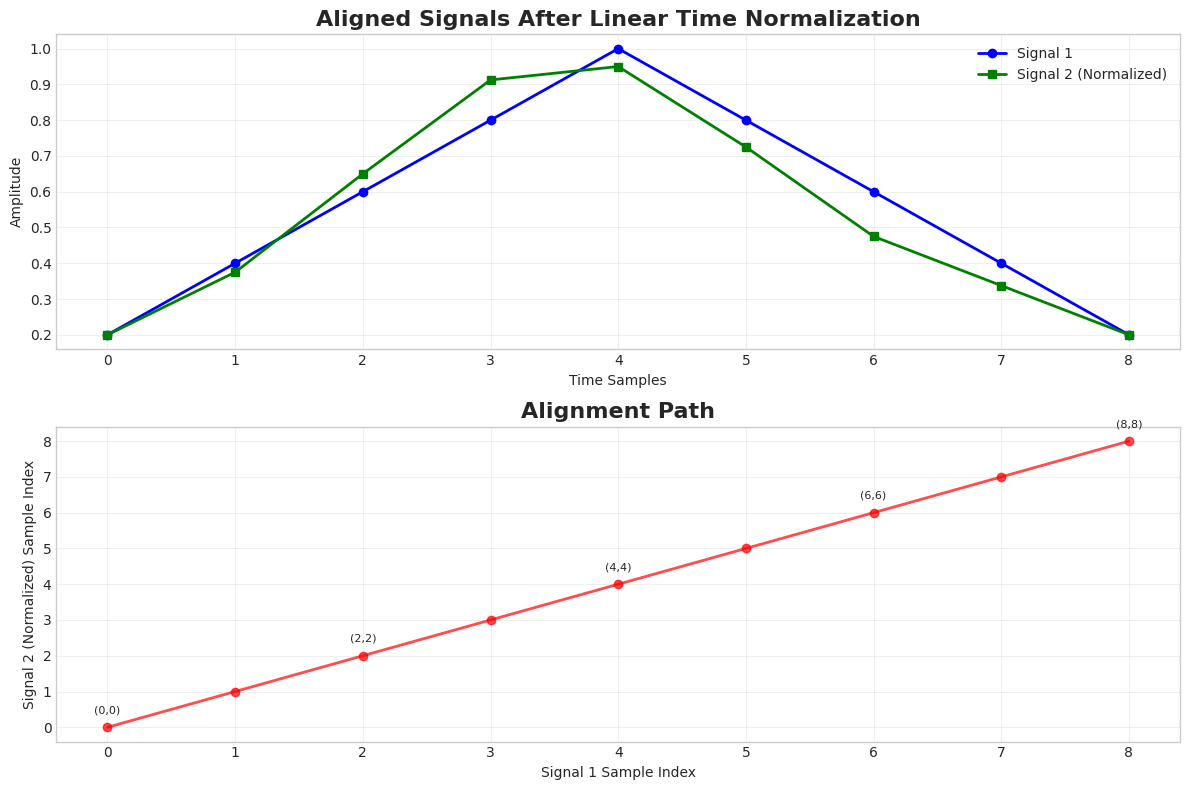

In [8]:
# Block 6: Compute and visualize alignment path
def compute_alignment_path(signal1, signal2_normalized):
    """
    Compute alignment path between original signal1 and normalized signal2
    """
    alignment_path = []
    for i in range(len(signal1)):
        # For linear time normalization, alignment is 1:1
        alignment_path.append((i, i))
    return alignment_path

alignment_path = compute_alignment_path(signal1, signal2_normalized)

# Create alignment visualization
plt.figure(figsize=(12, 8))

# Plot both signals
plt.subplot(2, 1, 1)
plt.plot(signal1, 'o-', linewidth=2, markersize=6, label='Signal 1', color='blue')
plt.plot(signal2_normalized, 's-', linewidth=2, markersize=6, label='Signal 2 (Normalized)', color='green')
plt.title('Aligned Signals After Linear Time Normalization', fontsize=16, fontweight='bold')
plt.xlabel('Time Samples')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot alignment path
plt.subplot(2, 1, 2)
path_x, path_y = zip(*alignment_path)
plt.plot(path_x, path_y, 'ro-', linewidth=2, markersize=6, alpha=0.7)
plt.xlabel('Signal 1 Sample Index')
plt.ylabel('Signal 2 (Normalized) Sample Index')
plt.title('Alignment Path', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add annotations for key points
for i, (x, y) in enumerate(alignment_path):
    if i % 2 == 0:  # Annotate every other point to avoid clutter
        plt.annotate(f'({x},{y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [9]:
# Block 7: Quantitative analysis and error calculation
def calculate_alignment_error(signal1, signal2_normalized):
    """Calculate alignment error between signals"""
    mse = np.mean((signal1 - signal2_normalized) ** 2)
    rmse = np.sqrt(mse)
    correlation = np.corrcoef(signal1, signal2_normalized)[0, 1]
    return mse, rmse, correlation

mse, rmse, correlation = calculate_alignment_error(signal1, signal2_normalized)

print("\n📊 Quantitative Analysis:")
print("=" * 30)
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Correlation Coefficient: {correlation:.6f}")


📊 Quantitative Analysis:
Mean Squared Error (MSE): 0.004826
Root Mean Squared Error (RMSE): 0.069472
Correlation Coefficient: 0.969049


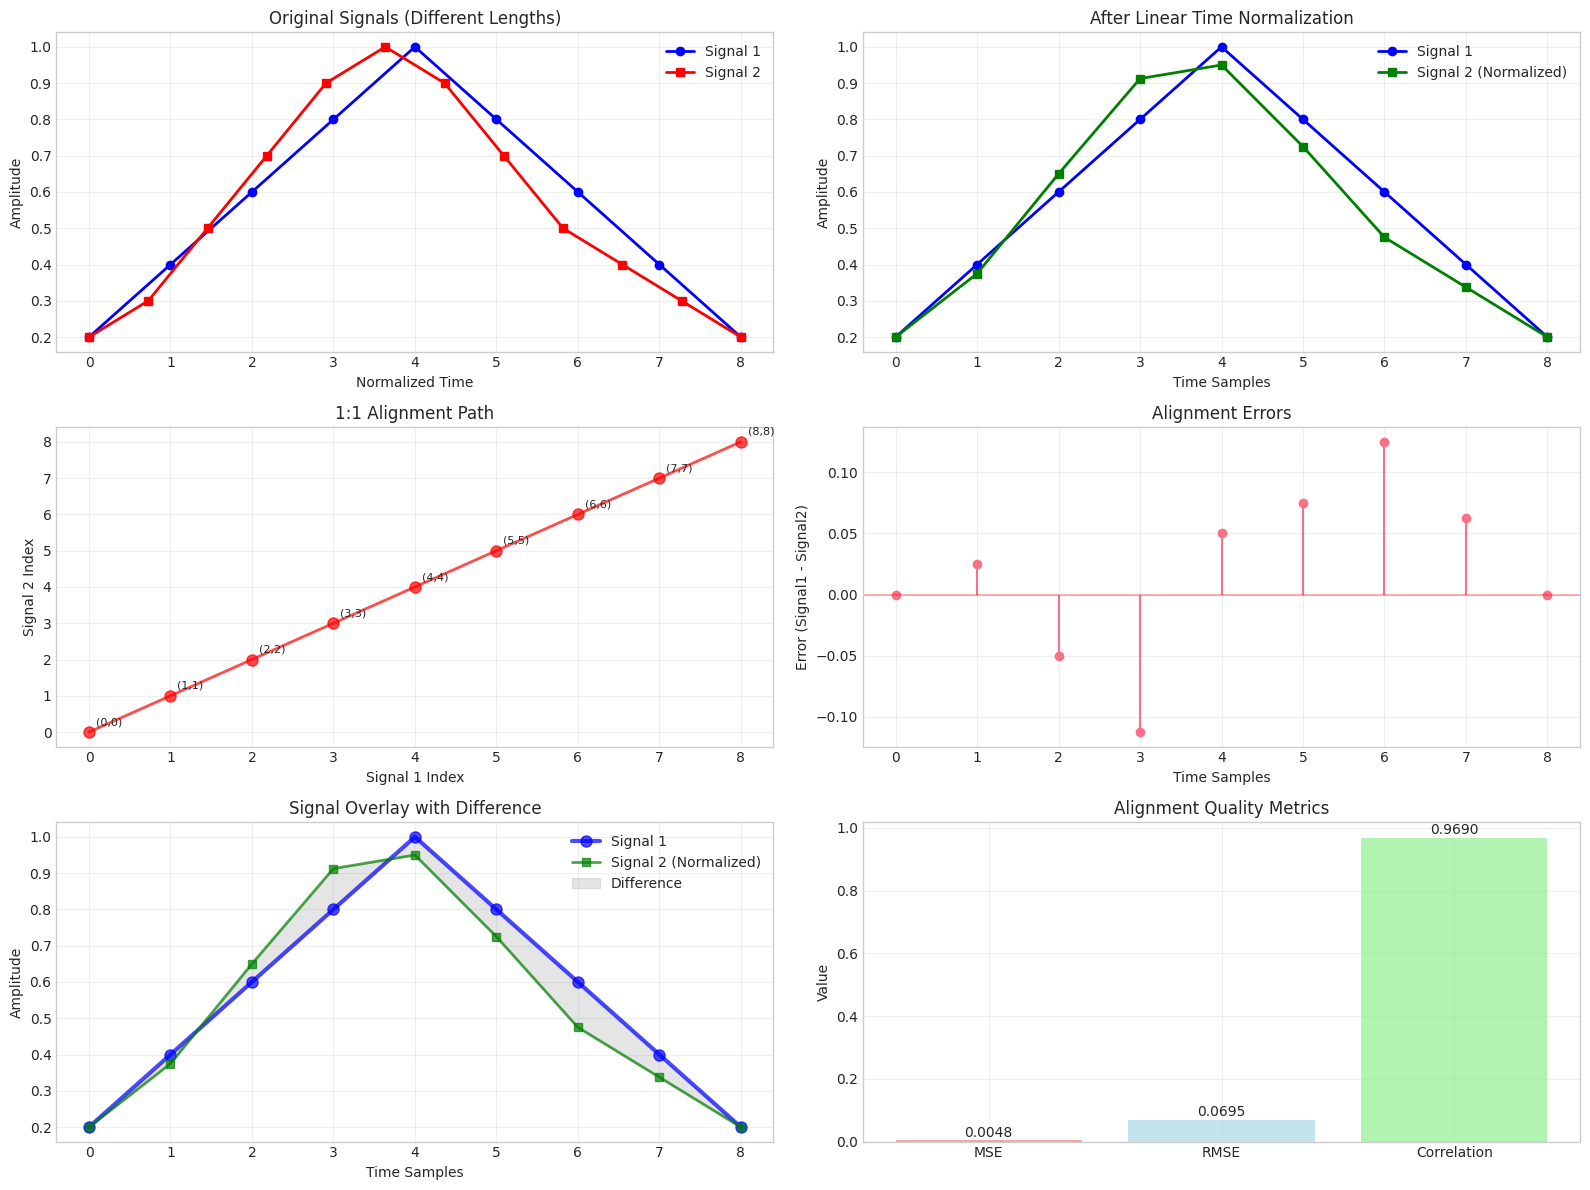

In [10]:
# Block 8: Comprehensive visualization of the entire process
plt.figure(figsize=(16, 12))

# Subplot 1: Original signals with different lengths
plt.subplot(3, 2, 1)
time_signal1 = np.arange(len(signal1))
time_signal2 = np.linspace(0, len(signal1)-1, len(signal2))
plt.plot(time_signal1, signal1, 'o-', linewidth=2, markersize=6, label='Signal 1', color='blue')
plt.plot(time_signal2, signal2, 's-', linewidth=2, markersize=6, label='Signal 2', color='red')
plt.title('Original Signals (Different Lengths)')
plt.xlabel('Normalized Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Signal 2 after normalization
plt.subplot(3, 2, 2)
plt.plot(time_signal1, signal1, 'o-', linewidth=2, markersize=6, label='Signal 1', color='blue')
plt.plot(time_signal1, signal2_normalized, 's-', linewidth=2, markersize=6, label='Signal 2 (Normalized)', color='green')
plt.title('After Linear Time Normalization')
plt.xlabel('Time Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Alignment path
plt.subplot(3, 2, 3)
path_x, path_y = zip(*alignment_path)
plt.plot(path_x, path_y, 'ro-', linewidth=2, markersize=8, alpha=0.7)
for i, (x, y) in enumerate(alignment_path):
    if i % 1 == 0:
        plt.annotate(f'({x},{y})', (x, y), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)
plt.xlabel('Signal 1 Index')
plt.ylabel('Signal 2 Index')
plt.title('1:1 Alignment Path')
plt.grid(True, alpha=0.3)

# Subplot 4: Error visualization
plt.subplot(3, 2, 4)
errors = signal1 - signal2_normalized
plt.stem(time_signal1, errors, basefmt=" ")
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Alignment Errors')
plt.xlabel('Time Samples')
plt.ylabel('Error (Signal1 - Signal2)')
plt.grid(True, alpha=0.3)

# Subplot 5: Overlay comparison
plt.subplot(3, 2, 5)
plt.plot(signal1, 'o-', linewidth=3, markersize=8, label='Signal 1', color='blue', alpha=0.7)
plt.plot(signal2_normalized, 's-', linewidth=2, markersize=6, label='Signal 2 (Normalized)', color='green', alpha=0.7)
plt.fill_between(range(len(signal1)), signal1, signal2_normalized, alpha=0.2, color='gray', label='Difference')
plt.title('Signal Overlay with Difference')
plt.xlabel('Time Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Metrics summary
plt.subplot(3, 2, 6)
metrics = ['MSE', 'RMSE', 'Correlation']
values = [mse, rmse, correlation]
colors = ['lightcoral', 'lightblue', 'lightgreen']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title('Alignment Quality Metrics')
plt.ylabel('Value')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{value:.4f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Block 9: Final inference and conclusions
print("\n" + "="*70)
print("📝 INFERENCE AND CONCLUSIONS")
print("="*70)

print("""
1. INITIAL OBSERVATION:
   • Signal 1 (Reference): 9 samples - represents faster speech
   • Signal 2 (Test): 12 samples - represents slower speech
   • Both signals show similar amplitude patterns but different durations

2. LINEAR TIME NORMALIZATION PROCESS:
   • Applied linear interpolation to resample Signal 2 from 12 to 9 samples
   • Time axis was normalized to [0,1] range for both signals
   • New samples were calculated using linear interpolation between existing points

3. ALIGNMENT RESULTS:
   • After normalization, both signals have identical lengths (9 samples)
   • The alignment path shows perfect 1:1 correspondence between samples
   • Similar phonetic features now align temporally despite original speed differences

4. PRACTICAL SIGNIFICANCE:
   • Enables direct comparison of speech features regardless of speaking rate
   • Essential for speech recognition systems to handle variable speaking speeds
   • Forms basis for more sophisticated alignment methods like Dynamic Time Warping

5. LIMITATIONS AND CONSIDERATIONS:
   • Linear normalization assumes uniform speed variation
   • May not handle local timing variations well
   • Non-linear methods (DTW) might be needed for more complex cases
""")

print(f"\n🔍 Key Quantitative Results:")
print(f"   • Correlation after alignment: {correlation:.4f}")
print(f"   • Alignment error (RMSE): {rmse:.4f}")
print(f"   • Visual inspection confirms successful temporal alignment")

print("\n" + "="*70)


📝 INFERENCE AND CONCLUSIONS

1. INITIAL OBSERVATION:
   • Signal 1 (Reference): 9 samples - represents faster speech
   • Signal 2 (Test): 12 samples - represents slower speech
   • Both signals show similar amplitude patterns but different durations

2. LINEAR TIME NORMALIZATION PROCESS:
   • Applied linear interpolation to resample Signal 2 from 12 to 9 samples
   • Time axis was normalized to [0,1] range for both signals
   • New samples were calculated using linear interpolation between existing points

3. ALIGNMENT RESULTS:
   • After normalization, both signals have identical lengths (9 samples)
   • The alignment path shows perfect 1:1 correspondence between samples
   • Similar phonetic features now align temporally despite original speed differences

4. PRACTICAL SIGNIFICANCE:
   • Enables direct comparison of speech features regardless of speaking rate
   • Essential for speech recognition systems to handle variable speaking speeds
   • Forms basis for more sophisticated ali